## MCP for Finance - Stock Researcher Agent

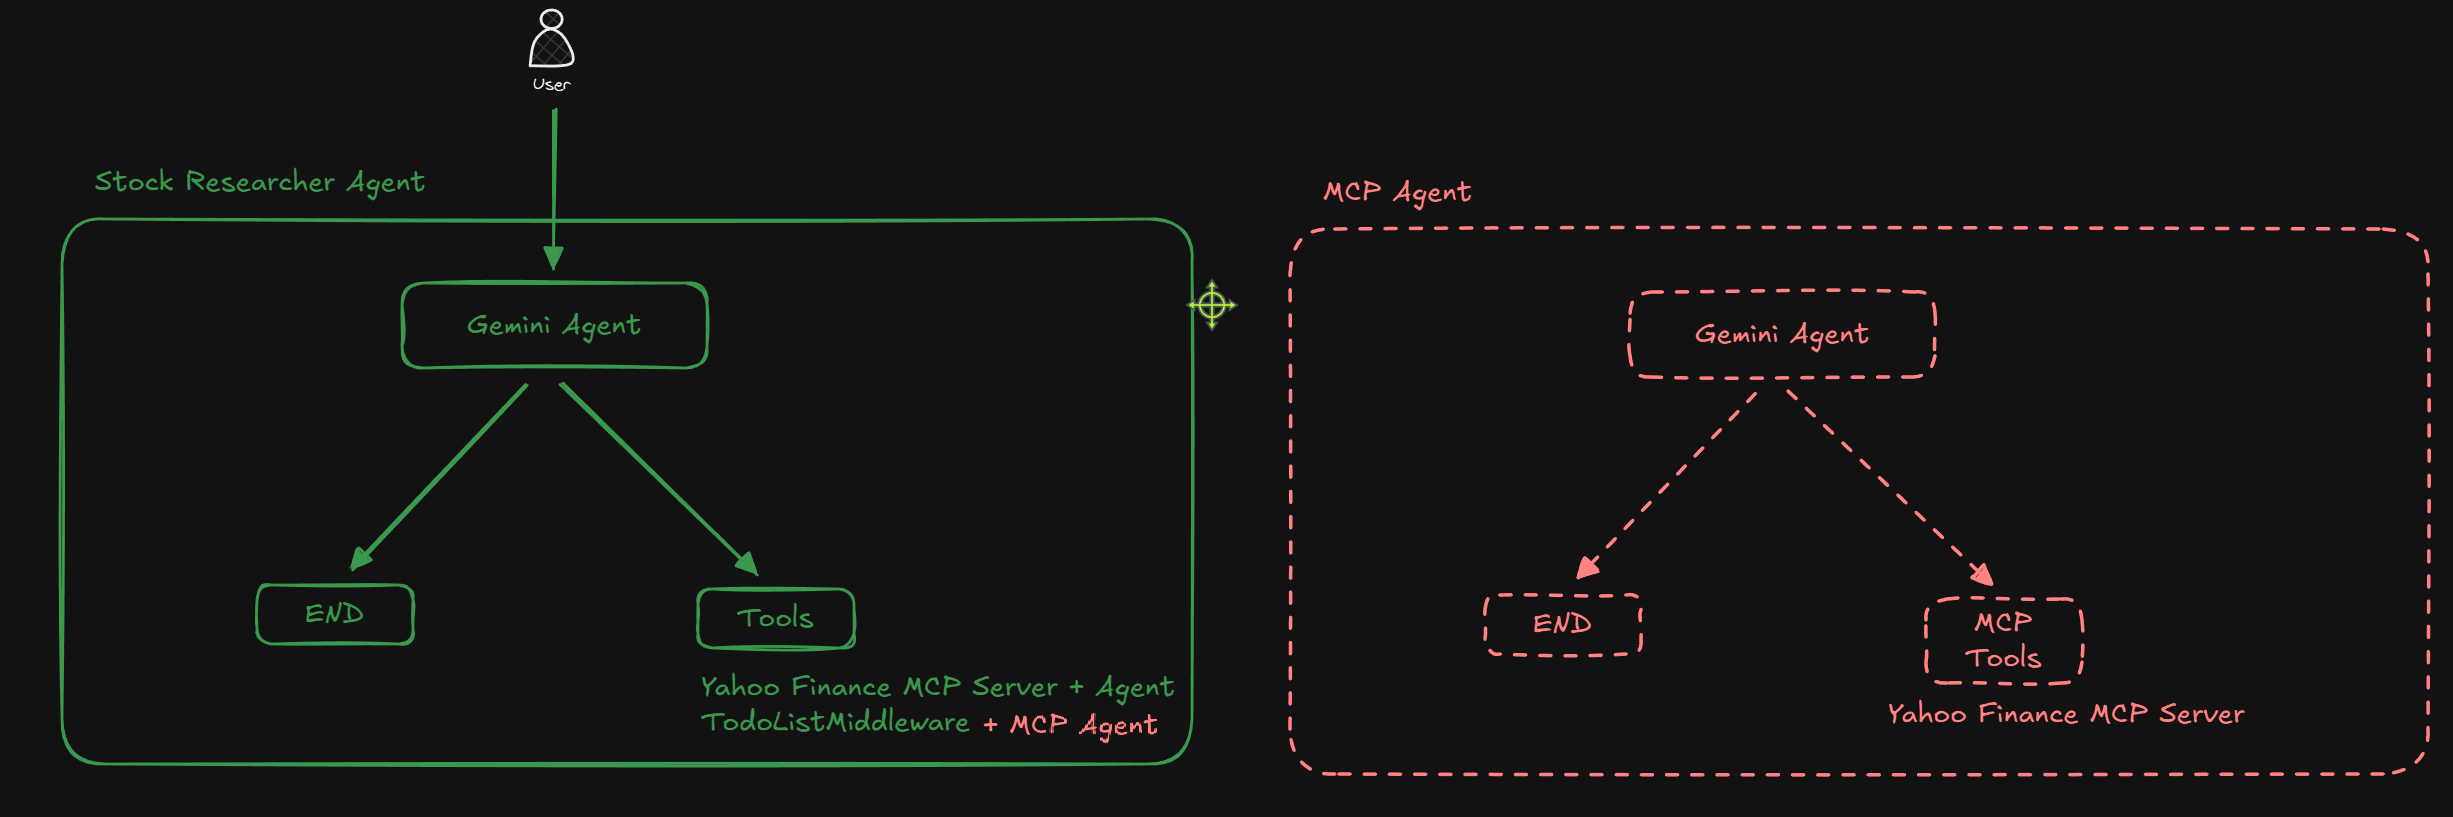
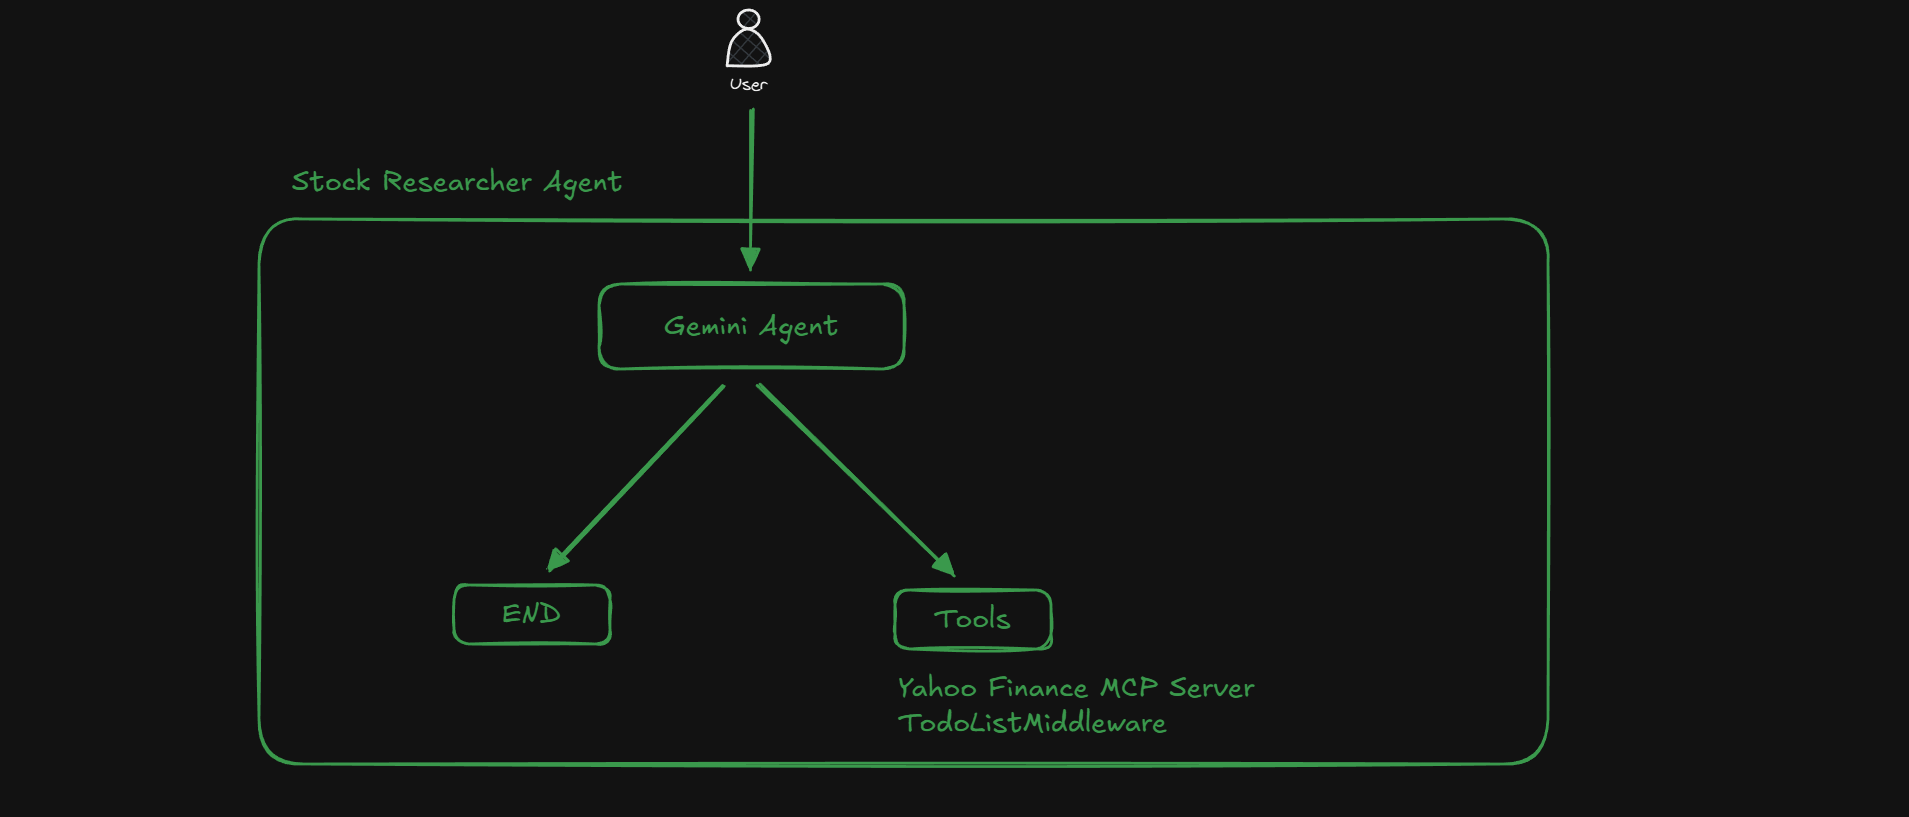
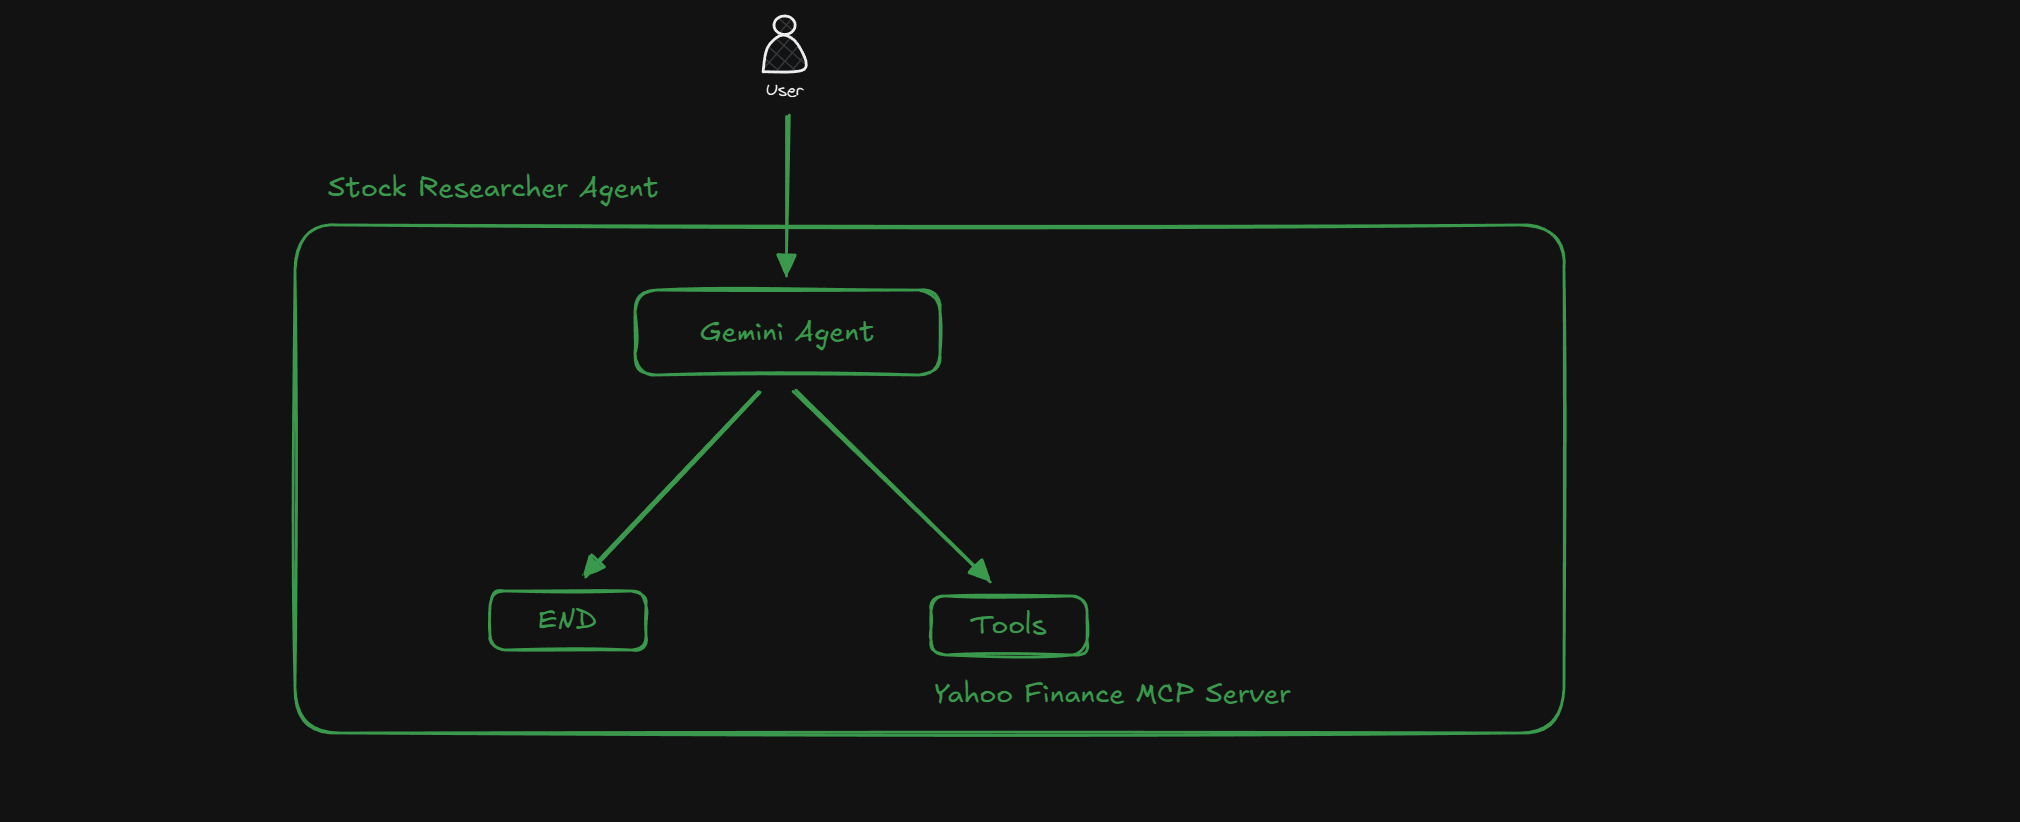

### Yahoo Finance Research Tool

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage

from langchain_core.tools import tool
from langchain.agents.middleware import TodoListMiddleware

import subprocess
import sys

In [5]:
@tool
def finance_researcher(query):
    """Research stocks using Yahoo Finance MCP async function.
    Call this tool whereever you need to answer finance related question"""

    code = f"""
import asyncio
from scripts.yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout


In [6]:
query = "What is the current stock price and recent performance of Apple (AAPL)? Also show me the latest news."
response = finance_researcher.invoke({'query': query})

In [8]:
print(response)

Loaded 9 tools
Tools available: ['get_historical_stock_prices', 'get_stock_info', 'get_yahoo_finance_news', 'get_stock_actions', 'get_financial_statement', 'get_holder_info', 'get_option_expiration_dates', 'get_option_chain', 'get_recommendations']
Here's the information about Apple (AAPL):

**Current Stock Price:**
*   **Current Price:** $278.78
*   **Previous Close:** $277.18
*   **Change Today:** +$1.60 (+0.58%)

**Recent Performance (Last Month):**
Over the last month, Apple's stock has shown a positive trend:
*   **Starting Price (November 11, 2025):** $275.25
*   **Current Price (December 10, 2025):** $278.78
*   **Overall Change in the Last Month:** +$3.53 (+1.28%)

During this period, the stock traded within a range:
*   **Highest Close:** $286.19 (December 2, 2025)
*   **Lowest Close:** $266.25 (November 20, 2025)

**Latest News:**
Here are some of the latest news headlines concerning Apple:

*   **UBS Reiterates Neutral on Apple (AAPL) as Interest in Apple Intelligence and Fo

### Stock Researcher Agent

#### System Prompt

In [10]:
system_prompt = """You are a professional stock research analyst specializing in financial analysis.

**Your Responsibilities:**
1. Analyze stock performance and financial metrics
2. Research company fundamentals
3. Provide data-driven investment recommendations
4. You must use available tools to answer user queries

**Analysis Framework:**
- Company name and ticker symbol
- Current stock price
- Key metrics: P/E ratio, Market Cap, Revenue
- Financial health assessment
- Clear recommendation: Buy, Hold, or Sell

**Important Guidelines:**
- Only respond to finance and stock market related questions
- For non-finance questions, politely decline: "I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics."
- Always cite specific data and metrics
- Maintain professional and objective tone

Provide concise, actionable insights for investors."""

#### Create Agent

In [11]:
from langchain.agents.middleware import TodoListMiddleware

model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

agent = create_agent(
    model=model,
    tools=[finance_researcher],
    system_prompt=system_prompt,
    middleware=[TodoListMiddleware()]
)

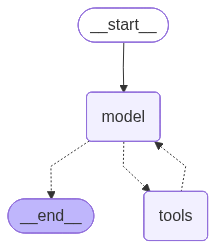

In [12]:
agent

#### Run Agent

In [13]:
response = agent.invoke({'messages': [HumanMessage('what is the weather in mumbai?')]})
response

{'messages': [HumanMessage(content='what is the weather in mumbai?', additional_kwargs={}, response_metadata={}, id='4d95eedf-b3f8-4840-84f1-05dccbcb1437'),
  AIMessage(content='I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--4256f7a4-26d3-4331-bae3-491a870b6e6a-0', usage_metadata={'input_tokens': 1416, 'output_tokens': 28, 'total_tokens': 1444, 'input_token_details': {'cache_read': 0}})]}

In [14]:
query = "Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table."

response = agent.invoke({'messages': [HumanMessage(query)]})

In [15]:
response

{'messages': [HumanMessage(content='Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.', additional_kwargs={}, response_metadata={}, id='d57fdb6a-c061-4bd5-b92b-97ff94d89f1a'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'write_todos', 'arguments': '{"todos": [{"status": "in_progress", "content": "Research Apple (AAPL) stock performance and key financial metrics."}, {"status": "pending", "content": "Research Microsoft (MSFT) stock performance and key financial metrics."}, {"status": "pending", "content": "Research Google (GOOGL) stock performance and key financial metrics."}, {"status": "pending", "content": "Compile all gathered data into a comparative table."}, {"status": "pending", "content": "Assess the financial health of each company."}, {"status": "pending", "content": "Provide investment recommendations for each stock."}]}'}, '__gemini_function_call_thought_signatures__': {'ba007184-0319-4cc0-97ed-c57

In [20]:
from IPython.display import display, Markdown

display(Markdown(response['messages'][-1].text))


## Stock Analysis: Apple (AAPL), Microsoft (MSFT), and Google (GOOGL)

This analysis provides a comparative overview of Apple, Microsoft, and Google, focusing on key financial metrics and offering investment recommendations.

### Comparative Stock Data

| Metric              | Apple (AAPL)           | Microsoft (MSFT)        | Google (GOOGL)          |
| :------------------ | :--------------------- | :---------------------- | :---------------------- |
| **Current Price**   | $278.78                | $478.56                 | $320.21                 |
| **Market Cap**      | $4.14 Trillion         | $3.56 Trillion          | $3.878 Trillion         |
| **Trailing P/E**    | 37.32                  | 34.01                   | 31.64                   |
| **Total Revenue**   | $416.16 Billion        | N/A (Quarterly Revenue Growth: 18.4%) | $385.48 Billion         |
| **Profit Margins**  | 26.915%                | 35.71%                  | 32.23%                  |
| **Debt to Equity**  | 152.41%                | 33.15%                  | 11.42%                  |
| **Return on Equity**| 171.42%                | 32.24%                  | 35.45%                  |
| **52-Week Change**  | +11.78%                | +6.45%                  | +65.18%                 |
| **Analyst Rating**  | 2.0 - Buy              | 1.3 - Strong Buy        | 1.5 - Strong Buy        |
| **Target Mean Price**| $285.28                | N/A                     | $327.51                 |

*Note: Some data points for Microsoft's total revenue were not directly available in the provided output, but quarterly revenue growth was noted.*

### Financial Health Assessment and Recommendations

**Apple (AAPL)**

*   **Financial Health:** Apple demonstrates strong profitability with high profit margins (26.915%) and an exceptional Return on Equity (ROE) of 171.42%. Its market capitalization is the highest among the three. However, its Debt to Equity ratio of 152.41% is significantly higher compared to its peers, indicating a greater reliance on debt financing.
*   **Recommendation:** **Hold**. While Apple exhibits strong profitability and analyst "Buy" ratings, the higher debt-to-equity ratio warrants caution. Investors should monitor debt management. The stock has shown positive, albeit more modest, 52-week growth compared to Google.

**Microsoft (MSFT)**

*   **Financial Health:** Microsoft presents a very healthy financial profile with strong profit margins (35.71%), a solid Return on Equity (32.24%), and a very manageable Debt to Equity ratio (33.15%). The company shows robust quarterly revenue growth of 18.4% and quarterly earnings growth of 12.5%.
*   **Recommendation:** **Buy**. Microsoft's strong financial health, impressive growth metrics, and "Strong Buy" analyst consensus make it an attractive investment. Its balanced financial structure and consistent performance offer a compelling case for continued growth.

**Google (GOOGL)**

*   **Financial Health:** Google showcases excellent financial health with strong profit margins (32.23%), a healthy Return on Equity (35.45%), and a remarkably low Debt to Equity ratio (11.42%). The company has a substantial cash position ($98.50 Billion) and has demonstrated significant 52-week stock performance (+65.18%).
*   **Recommendation:** **Buy**. Google's robust financial position, impressive stock growth, and "Strong Buy" analyst ratings highlight its strong market position and future potential. Its low debt and high profitability make it a financially sound investment.

### Conclusion

All three companies are technology giants with strong market positions. Microsoft and Google, however, show more robust financial health with lower debt levels and comparable or better profitability metrics, coupled with strong analyst sentiment. Apple, while highly profitable, has a higher debt burden that investors should consider.

This analysis is based on available data and should be used as a starting point for further due diligence.